# import necessary libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection  import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 0 :  READING THE DATA

In [8]:
data=pd.read_csv('Fytlyff_DS_Interview.csv')        # reading the .csv file 

this returns the top 5 rows of the dataframe

In [9]:
data.head()         # .head() gives the top 5 rows of dataset by default

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


In [10]:
#data.isnull().sum()

# column names

In [11]:
data.columns                       #.columns to get column names in data

Index(['Year', 'Month', 'MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?',
       'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'],
      dtype='object')

# Datatypes of given columns

In [71]:
data.dtypes                 #

Year                                                                                                                           int64
Month                                                                                                                          int64
MobileWeb_or_Web                                                                                                              object
Type_of_Customers?                                                                                                            object
Where_Are_They_comming_from?                                                                                                  object
Which_Place_in_India?                                                                                                         object
How_many_Landed_on_our_Page?                                                                                                 float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?             

# Part 1 : DATA CLEANING 

i) Replaces the NA values with 0s in the data

ii) In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…

iii) In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic” 


In [13]:
# firstly we will check how many columns have null values and its count
data.isnull().sum()

Year                                                                                                                            0
Month                                                                                                                           0
MobileWeb_or_Web                                                                                                                0
Type_of_Customers?                                                                                                              0
Where_Are_They_comming_from?                                                                                                    0
Which_Place_in_India?                                                                                                           0
How_many_Landed_on_our_Page?                                                                                                 1080
How_many_Landed_on_the_our_Page_and_clicked_on_a_button?                                  

In [14]:
from time import strptime  # to convert month name to numeric value

defining a function

In [15]:
def data_cleaning(col):
    data.fillna(0,inplace=True)       # replacing na values with o
    if i=='Month':
       data['Month'] = [strptime(str(x), '%b').tm_mon for x in data['Month']]   # converting month name with numeric digit
    elif i=='Where_Are_They_comming_from?':
        data['Where_Are_They_comming_from?']= data['Where_Are_They_comming_from?'].replace(['Came_From_Google','Landed_on_the_page_Directly'],['Google','Direct_traffic'])
        # replacing the previous rows names with new name using .replace 
        
        

In [16]:
for i in ['Month','Where_Are_They_comming_from?', 'How_many_Landed_on_our_Page?','How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']:
    data_cleaning(i)     # function call
             

# Part 2: DESCRIPTIVE STATISTICS


In [17]:
data.columns

Index(['Year', 'Month', 'MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?',
       'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'],
      dtype='object')

In [18]:
# define a function to get the mean , median , sd etc using .describe and also
#the unique elements present is particular columns and its data types
def descriptive_stats(col):  
    if col in ['Year', 'Month', 'How_many_Landed_on_our_Page?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
        'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']:
        
        print(data[col].describe(),'\n')
    else:
        print('Unique ',data[col].unique(), ': ', data[col].dtypes)
        
        
        


In [19]:
for i in ['Year', 'Month', 'How_many_Landed_on_our_Page?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?',
       'How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']:
    descriptive_stats(i)   # function call for first time with given list of numeric data
for j in ['MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?']:
    descriptive_stats(j)    # function call for second time for a list og categorical data
    

count    2160.000000
mean     2020.000000
std         0.816686
min      2019.000000
25%      2019.000000
50%      2020.000000
75%      2021.000000
max      2021.000000
Name: Year, dtype: float64 

count    2160.000000
mean        6.500000
std         3.452852
min         1.000000
25%         3.750000
50%         6.500000
75%         9.250000
max        12.000000
Name: Month, dtype: float64 

count    2.160000e+03
mean     3.922474e+05
std      9.555773e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.228350e+04
75%      3.816422e+05
max      1.127413e+07
Name: How_many_Landed_on_our_Page?, dtype: float64 

count    2.160000e+03
mean     1.792281e+05
std      3.951562e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.212500e+03
75%      1.730452e+05
max      4.079301e+06
Name: How_many_Landed_on_the_our_Page_and_clicked_on_a_button?, dtype: float64 

count    2.160000e+03
mean     1.510725e+05
std      2.353538e+05
min      3.761000e+03
25%      3.360800e+04
50%      

# Part 3: PRESCRIPTIVE STATISTICS

1:  “Which_Place_in_India?”  has the highest “How_many_Landed_on_the_our_Page?”


In [20]:
data[['Which_Place_in_India?','How_many_Landed_on_our_Page?']].max()

Which_Place_in_India?                 Pune
How_many_Landed_on_our_Page?    11274131.0
dtype: object

2: “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”

In [21]:
data['div_data']=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']/data['How_many_Landed_on_our_Page?']

In [22]:
data[['div_data','Which_Place_in_India?']].max()

div_data                  inf
Which_Place_in_India?    Pune
dtype: object

# Part 4: SIMPLE MACHINE LEARNING QUESTIONS

In [23]:
# droppig the data which is to be predicted after while and after training the model and drop categorical data aswell
X= data.drop(['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?','MobileWeb_or_Web', 'Type_of_Customers?',
       'Where_Are_They_comming_from?', 'Which_Place_in_India?','div_data'],axis=1)

In [24]:
x=X[1440:]      # to train the data
x

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?
1440,2021,1,0.0,0.0,33812
1441,2021,1,0.0,0.0,93522
1442,2021,1,0.0,0.0,39599
1443,2021,1,0.0,0.0,128269
1444,2021,1,0.0,0.0,86085
...,...,...,...,...,...
2155,2021,12,67299.0,21255.0,6984
2156,2021,12,430294.0,156510.0,46676
2157,2021,12,48713.0,27770.0,7515
2158,2021,12,593021.0,310836.0,161575


In [25]:
x.shape

(720, 5)

In [26]:
Y=data['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']

In [27]:
y=Y[1440:]

In [72]:
# training the data with complete dataset and then returning a trained model
def pred_future(i,j):
    X_train,X_test,y_train,y_test= train_test_split(i,j,test_size=0.3,random_state=0)
    model_linear_reg= LinearRegression()
    model=model_linear_reg.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    return model

pred_future(X,Y)

LinearRegression()

In [73]:
#again calling the function and now predicting the output using the trained model
model= pred_future(x,y)
predict_all=model.predict(x)          # predicting for 2022 
y, predict_all = np.array(y), np.array(predict_all)                # converting data into array form for easy handling
mape = np.mean(np.abs((y-predict_all) / y))                         #calculating the MAPE pf predicted for year 2021
print('\n')
print(' MAPE of prediction for the year 2021 is : ',mape)



 MAPE of prediction for the year 2021 is :  1.9414195785357695


In [31]:
# predicted value for 2022 data
predict_all             

array([ 27985.06370441,  39153.46561041,  29067.48778463,  45652.6861937 ,
        37762.41880125,  34320.99480748,  50376.85847539,  42473.12390932,
        59939.6740146 ,  74340.57167909,  23166.43416326,  26064.49511003,
        24924.83554189,  27908.56267645,  26902.26553603,  30358.26369943,
        51386.74840169,  31498.0156709 ,  98228.15528637,  45147.39150719,
        42780.81342133,  65800.76330221,  45324.9532052 , 108669.86231069,
       179122.56518127,  23605.6090609 ,  30080.5803334 ,  25150.28726919,
        42808.81837095,  33680.32061613,  23183.45517437,  27029.45550917,
        23627.49781588,  34293.87341615,  27515.77011235,  29225.54003067,
        41762.16936829,  33478.36123544,  67671.32802878,  65116.68000948,
        22915.98214262,  24396.24897706,  23325.60867376,  26772.64398988,
        27326.10741711,  24811.9420174 ,  35558.01881342,  26610.37079631,
        85171.35738286,  33174.3211875 ,  36745.95585389,  63611.2196663 ,
        34534.45674001, 2

# Part 5: VISUALIZATION



.

1 : 
A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020.


<AxesSubplot:xlabel='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', ylabel='Which_Place_in_India?'>

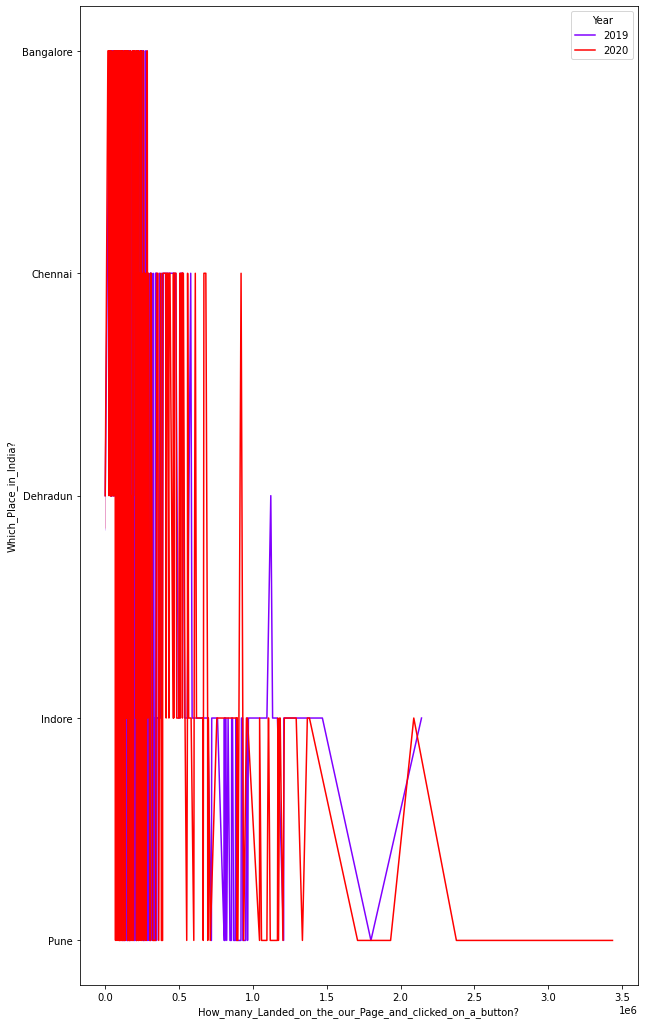

In [32]:
plt.figure(figsize=(10,18))
sns.lineplot(x='How_many_Landed_on_the_our_Page_and_clicked_on_a_button?', y="Which_Place_in_India?", data=data[data['Year']<2021], hue='Year',palette='rainbow')

.

2 : 
A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the months of the year 2021 & 2022


In [64]:
# need to make new dataframe for making line plot of predicted values
df= pd.DataFrame({'Actual (2021)': y,'predict (2022)': predict_all ,'year': data['Year'][1440:]})


<AxesSubplot:xlabel='Actual (2021)', ylabel='predict (2022)'>

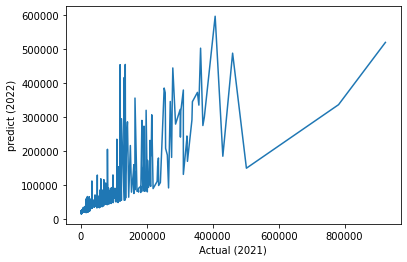

In [66]:
sns.lineplot(x='Actual (2021)',y='predict (2022)',data=df)

# Part 6: About the Previous projects


I have been constantly learning and implimenting the Data Science and Machine Learning concepts . I've made several projects on the same which helped me understanding this domain in more detail.
I have done Prutor(IIT Kanpur) training and Internship course in DATA SCIENCE with PYTHON. I also have done UDEMY COURSE which has helped me understanding several libraries (Pandas,Matplotlib,Numpy,Seaborn,SkLearn, NLP basics etc) in details with its implimentations.

Below are the list of projects I have built during learning process :

1].  AIRLINE FLIGHT FARE PREDICTION :
      https://github.com/fiz-102/fizzz/blob/2abcd798a70a23b35c09a49efbad0221d5c739ce/PROJECT%201.ipynb
      
     project Description :This project plays very important role in giving me the insights of data and I've learnt alot during making this project .

2].  PASSWORD STRENGTH PREDICTION  :
     https://github.com/fiz-102/fizzz/blob/2abcd798a70a23b35c09a49efbad0221d5c739ce/PROJECT%202.ipynb
    
    Project Description : I have used TF-IDF in NLP to predict the strength of password .In this project i firstly converted                           the data into array form so that dependent and independent variables can be used effectively to get                              accurate result.

3].  BREAST CANCER DETECTION :
        https://github.com/fiz-102/fizzz/blob/97782068e579a95eb20d963f69f0eb4bb064e944/BreastCancerDetection%20...ipynb
        
     Project Description :    On the basis of given data this model predicts if the person has breast cancer or not . In this I was required to do some label encoding to allow machine to understand the information .


# Part 7 : Time management


 I have this habit of managing time since i was in 9th class . For me it is very necessary to have balance of time to do all works and extra activities .This skill will decide if we will be successful or not . So, if I got selected, I will manage my time by being present in the moment ,have proper plan for managing my time. like for my college assignments i would manage them in between gaps and i will try to complete any work as soon as possible so that i have some free time for new work aswell.

THANKYOU 